## Import all libraries

In [29]:
import pandas as pd
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,f1_score,recall_score,precision_score,confusion_matrix,roc_auc_score
from sklearn.feature_extraction.text import CountVectorizer
from IPython.display import Image  
from sklearn import tree
from os import system
import warnings
warnings.filterwarnings('ignore')
import random
num_bins=10

## Import the dataset and print a sample

In [2]:
depositdata=pd.read_csv("C:/Users/ssankar4/Documents/AIML/Decision Trees/bank-full.csv")

depositdata.head(10) #has missing values - many unknown data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,no
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,-1,0,unknown,no
8,58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,-1,0,unknown,no
9,43,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,-1,0,unknown,no


# The data shows many unknown values and many categorical columns

In [3]:
depositdata.shape ## Lets check the number of rows and columns

(45211, 17)

In [4]:
depositdata.dtypes #print datatypes of all attributes - many object columns

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
Target       object
dtype: object

In [5]:
depositdata.describe() # data description 

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [6]:
depositdata.info() # it is needed to convert columns with object dtype into categorical values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  Target     45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 4.1+ MB


In [7]:
for feature in depositdata.columns: 
    if depositdata[feature].dtype == 'object': 
        depositdata[feature] = pd.Categorical(depositdata[feature])
depositdata.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,no
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,-1,0,unknown,no
8,58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,-1,0,unknown,no
9,43,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,-1,0,unknown,no


In [8]:
print(depositdata.job.value_counts())
print(depositdata.marital.value_counts())
print(depositdata.education.value_counts())
print(depositdata.default.value_counts())
print(depositdata.housing.value_counts())
print(depositdata.loan.value_counts())
print(depositdata.contact.value_counts())
print(depositdata.month.value_counts())
print(depositdata.poutcome.value_counts())
print(depositdata.Target.value_counts())


blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64
married     27214
single      12790
divorced     5207
Name: marital, dtype: int64
secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64
no     44396
yes      815
Name: default, dtype: int64
yes    25130
no     20081
Name: housing, dtype: int64
no     37967
yes     7244
Name: loan, dtype: int64
cellular     29285
unknown      13020
telephone     2906
Name: contact, dtype: int64
may    13766
jul     6895
aug     6247
jun     5341
nov     3970
apr     2932
feb     2649
jan     1403
oct      738
sep      579
mar      477
dec      214
Name: month, dtype: int64
unknown    36959
failure     4901
other       1840
success     1511
Name: poutcome, dtype: int64
n

In [9]:
replaceStruct = {
                "job":     {"blue-collar": 1, "management": 2 ,"technician": 3 ,"admin.": 4, "services": 5 ,"retired": 6 ,"self-employed":7,"entrepreneur": 8, "unemployed": 9 ,"housemaid": 10 ,"student":11,"unknown":-1},
                "marital": {"married": 1, "single":2 , "divorced": 3},
                 "education": {"secondary": 1, "tertiary":2 , "primary": 3,"unknown": -1},
                 "contact":     {"cellular": 1, "telephone": 2 ,"unknown": -1},
                 "poutcome":     {"failure": 1, "other": 2 ,"success" : 3,"unknown": -1},
                "housing":     {"no": 0, "yes": 1 },
                "loan":     {"no": 0, "yes": 1 },
                "Target":     {"no": 0, "yes": 1 },
                "month":     {"jan": 1, "feb": 2 ,"mar": 3 ,"apr": 4, "may": 5 ,"jun": 6 ,"jul":7,"aug": 8, "sep": 9 ,"oct": 10 ,"nov":11,"dec":12},
                "default":     {"no": 0, "yes": 1 } 
                    }


In [10]:
depositdata=depositdata.replace(replaceStruct)
depositdata.head(10)



,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,2,1,2,0,2143,1,0,-1,5,5,261,1,-1,0,-1,0
1,44,3,2,1,0,29,1,0,-1,5,5,151,1,-1,0,-1,0
2,33,8,1,1,0,2,1,1,-1,5,5,76,1,-1,0,-1,0
3,47,1,1,-1,0,1506,1,0,-1,5,5,92,1,-1,0,-1,0
4,33,-1,2,-1,0,1,0,0,-1,5,5,198,1,-1,0,-1,0
5,35,2,1,2,0,231,1,0,-1,5,5,139,1,-1,0,-1,0
6,28,2,2,2,0,447,1,1,-1,5,5,217,1,-1,0,-1,0
7,42,8,3,2,1,2,1,0,-1,5,5,380,1,-1,0,-1,0
8,58,6,1,3,0,121,1,0,-1,5,5,50,1,-1,0,-1,0
9,43,3,2,1,0,593,1,0,-1,5,5,55,1,-1,0,-1,0


In [11]:
depositdata.info() # All object columns have been converted to integers now

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   age        45211 non-null  int64
 1   job        45211 non-null  int64
 2   marital    45211 non-null  int64
 3   education  45211 non-null  int64
 4   default    45211 non-null  int64
 5   balance    45211 non-null  int64
 6   housing    45211 non-null  int64
 7   loan       45211 non-null  int64
 8   contact    45211 non-null  int64
 9   day        45211 non-null  int64
 10  month      45211 non-null  int64
 11  duration   45211 non-null  int64
 12  campaign   45211 non-null  int64
 13  pdays      45211 non-null  int64
 14  previous   45211 non-null  int64
 15  poutcome   45211 non-null  int64
 16  Target     45211 non-null  int64
dtypes: int64(17)
memory usage: 5.9 MB


In [12]:
depositdata.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,45211.0,40.936210,10.618762,18.0,33.0,39.0,48.0,95.0
job,45211.0,3.618212,2.610178,-1.0,2.0,3.0,5.0,11.0
marital,45211.0,1.513238,0.692948,1.0,1.0,1.0,2.0,3.0
education,45211.0,1.515118,0.894037,-1.0,1.0,1.0,2.0,3.0
default,45211.0,0.018027,0.133049,0.0,0.0,0.0,0.0,1.0
balance,45211.0,1362.272058,3044.765829,-8019.0,72.0,448.0,1428.0,102127.0
housing,45211.0,0.555838,0.496878,0.0,0.0,1.0,1.0,1.0
loan,45211.0,0.160226,0.366820,0.0,0.0,0.0,0.0,1.0
contact,45211.0,0.488310,0.976936,-1.0,-1.0,1.0,1.0,2.0
day,45211.0,15.806419,8.322476,1.0,8.0,16.0,21.0,31.0


Seeing the distribution of data above , minimum values of few attributes are 0s but these are valid data , so no need to treat these 0s

## Univariate Plots

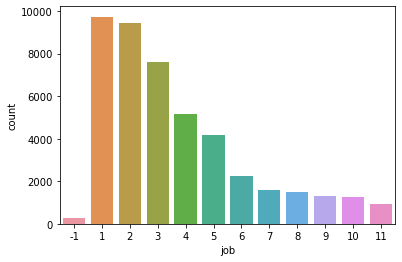

In [13]:
#plot the graphs of different variable to see the distributions.

sns.countplot(depositdata['job'])

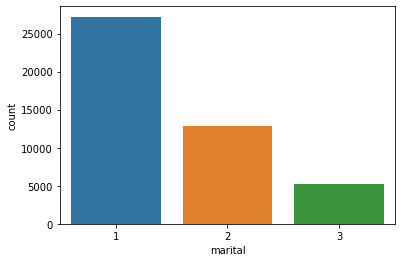

In [14]:
sns.countplot(depositdata['marital'])

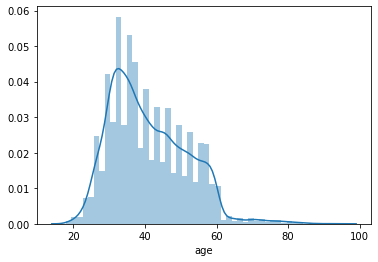

In [15]:
sns.distplot(depositdata['age'])

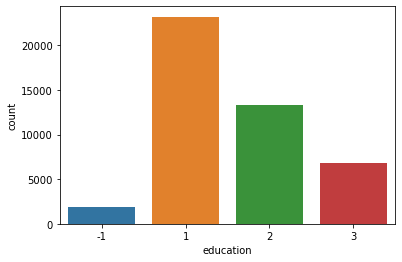

In [16]:
sns.countplot(depositdata['education'])

## Multivariate analysis

 Using box plots / pair plot and correlations to find the relationships between variables

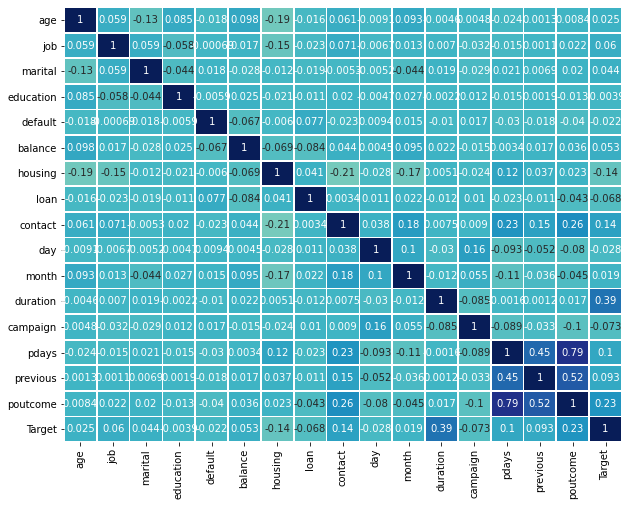

In [17]:
plt.figure(figsize=(10,8))
sns.heatmap(depositdata.corr(),
            annot=True,
            linewidths=.7,
            center=0,
            cbar=False,
            cmap="YlGnBu")
plt.show()

Analysis between all variables and target column to find the most significant columns

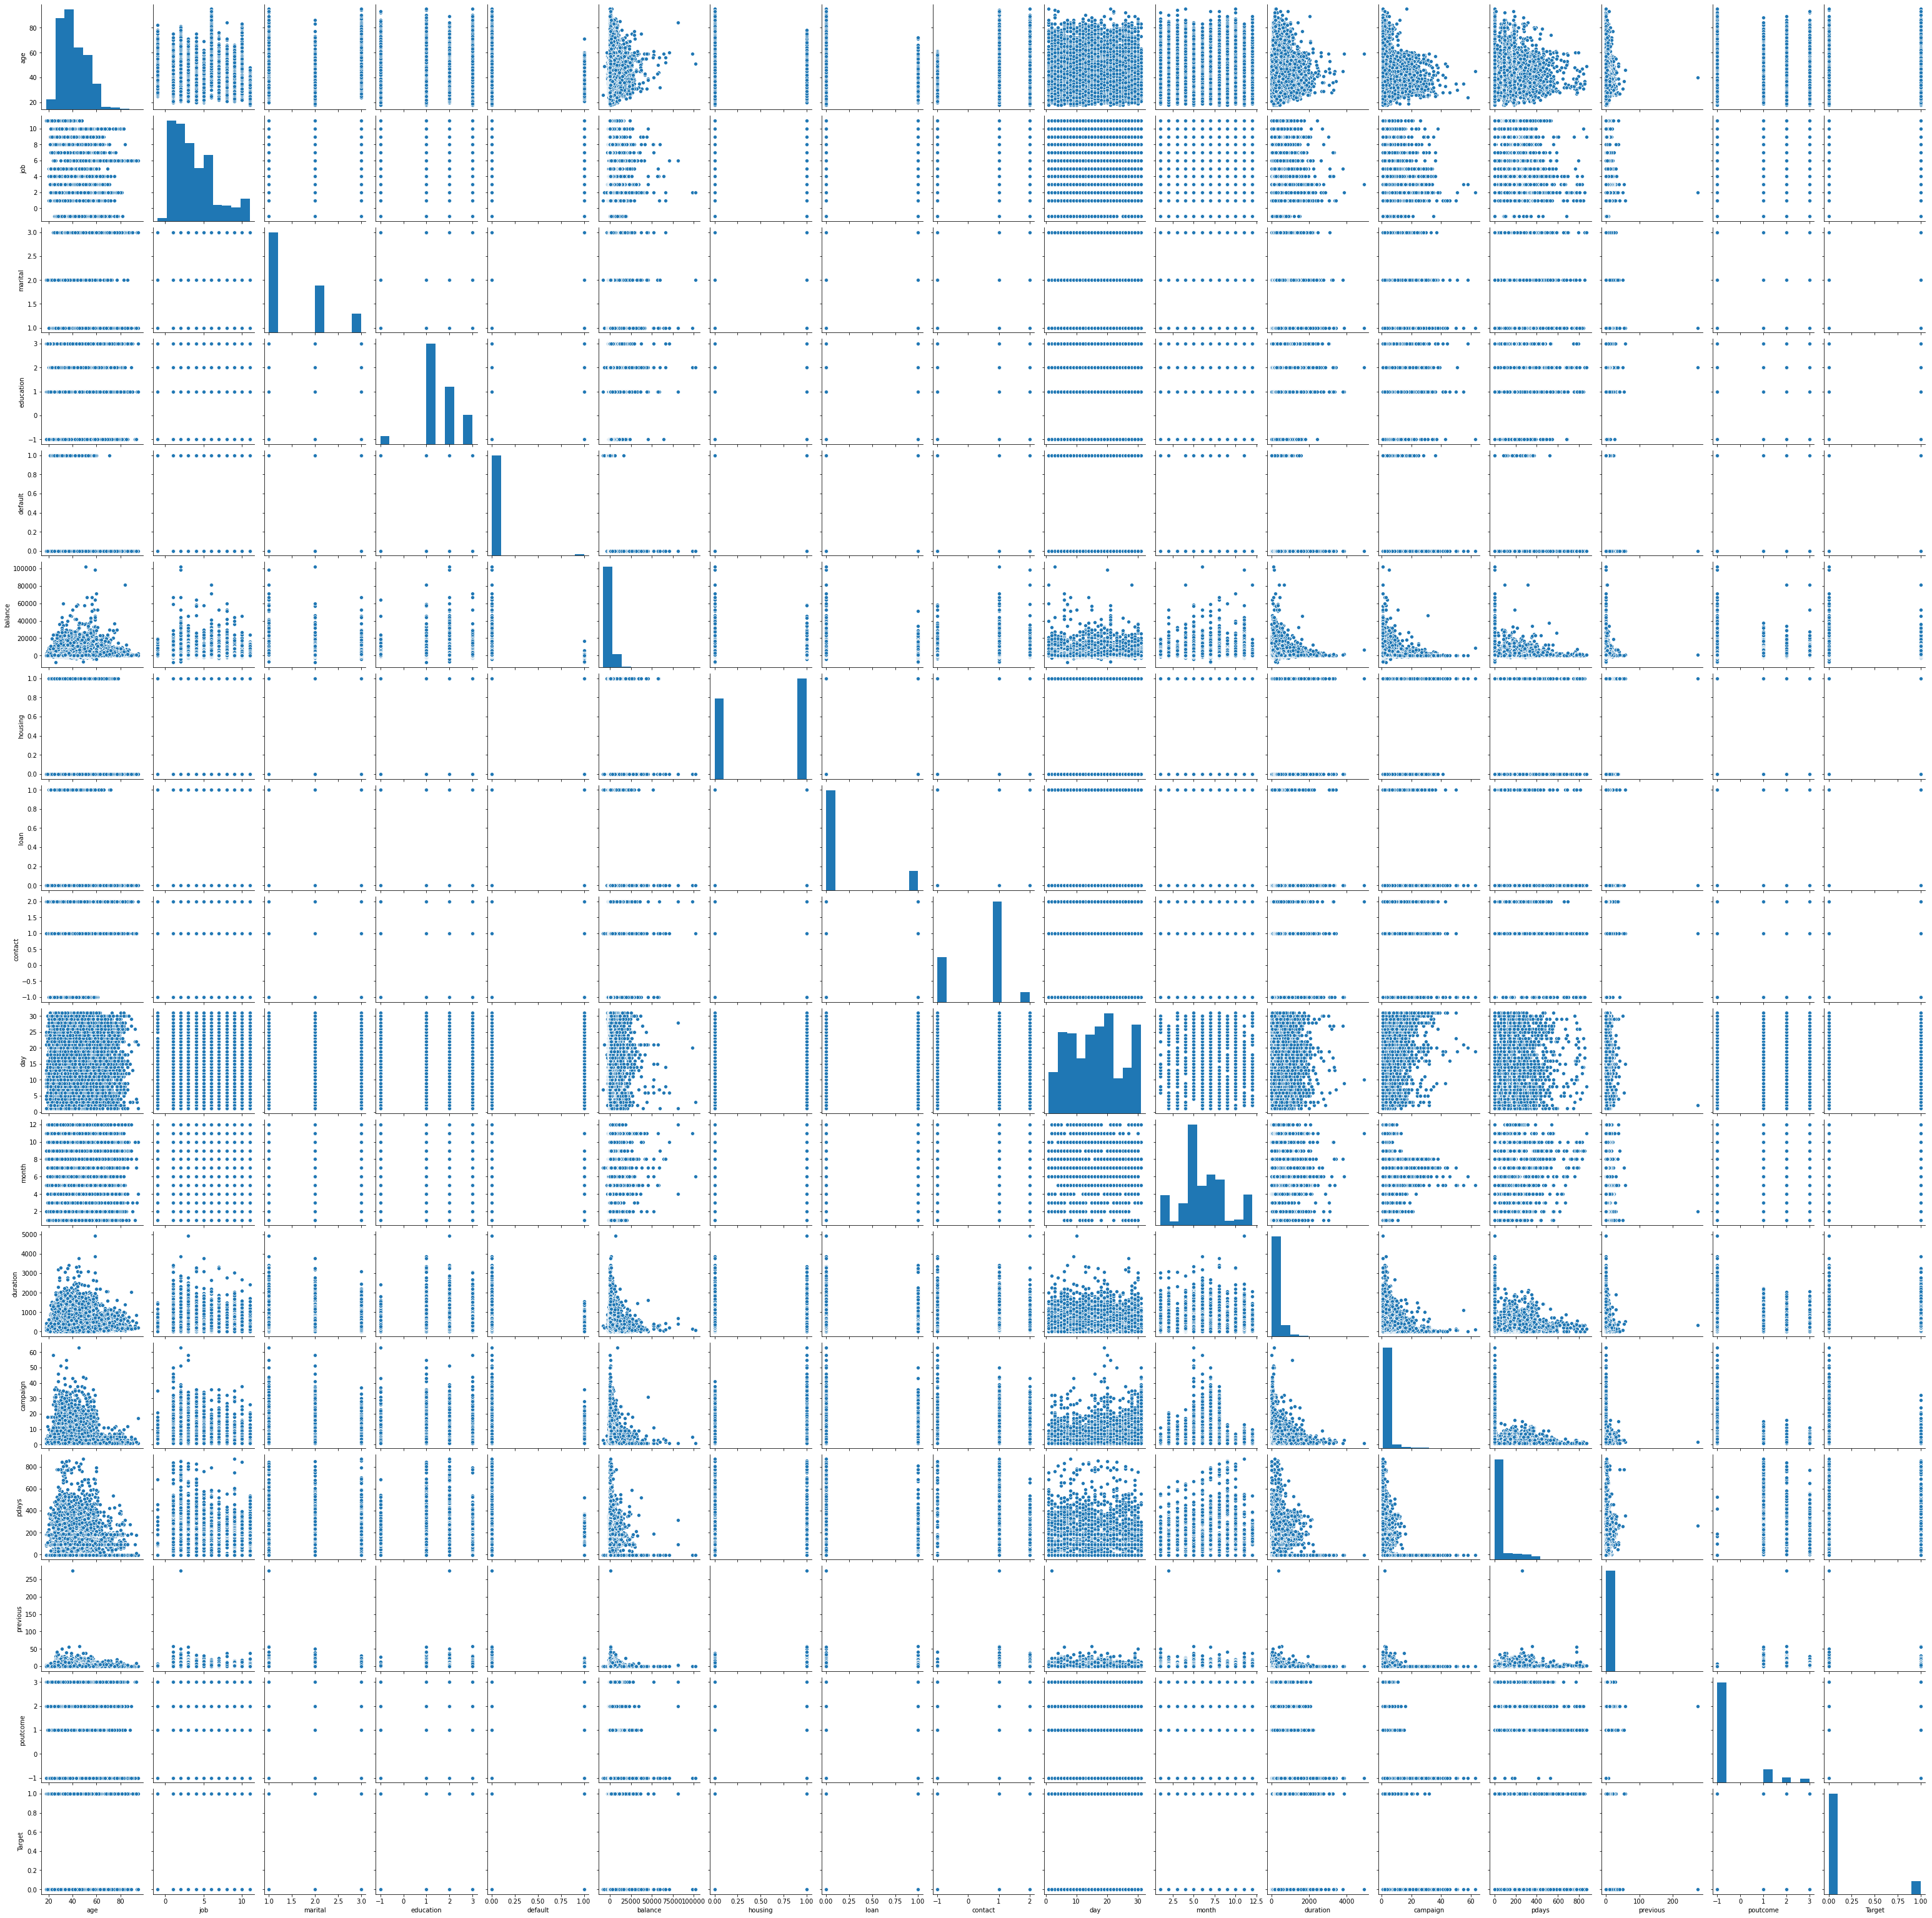

In [18]:
sns.pairplot(depositdata, palette="husl")

We are going to build a model to find potential customers - pdays gives the last contacted details , so day/month/durations columns are not much impact giving columns 

Current campaign term is not needed as we are going to compare data of previous campaign

Let's drop all these columns

Apart from these , there is no linear relationship between the variables / no strong correlation


In [19]:
depositdata=depositdata.drop(columns=['day','month','duration','campaign'])
depositdata.head()

,age,job,marital,education,default,balance,housing,loan,contact,pdays,previous,poutcome,Target
0,58,2,1,2,0,2143,1,0,-1,-1,0,-1,0
1,44,3,2,1,0,29,1,0,-1,-1,0,-1,0
2,33,8,1,1,0,2,1,1,-1,-1,0,-1,0
3,47,1,1,-1,0,1506,1,0,-1,-1,0,-1,0
4,33,-1,2,-1,0,1,0,0,-1,-1,0,-1,0


## Make model ready and split data

In [20]:
y = depositdata['Target']
X = depositdata.drop("Target" , axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30, random_state=1)

In [21]:
X.head()

,age,job,marital,education,default,balance,housing,loan,contact,pdays,previous,poutcome
0,58,2,1,2,0,2143,1,0,-1,-1,0,-1
1,44,3,2,1,0,29,1,0,-1,-1,0,-1
2,33,8,1,1,0,2,1,1,-1,-1,0,-1
3,47,1,1,-1,0,1506,1,0,-1,-1,0,-1
4,33,-1,2,-1,0,1,0,0,-1,-1,0,-1


In [22]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Target, dtype: int64

We dont seem to have any decimal values , so rounding off is not needed

## Predict Target variable for Test data - Logistic Regression

In [24]:
from sklearn.linear_model import LogisticRegression 

lr = LogisticRegression(random_state=7)
lr.fit(X_train,y_train)

LogisticRegression(random_state=7)

In [26]:
y_predict=lr.predict(X_test) # predict target variable on test data

y_predict

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [27]:
## Function for CM

def draw_cm( actual, predicted ):
    cm = confusion_matrix( actual, predicted, [1,0] )
    sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels = ["Default", "No Default"] , yticklabels = ["Default", "No Default"] )
   # plt.figure(figsize=(20,20))
    sns.set(font_scale=0.4)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

Training accuracy 0.8872562960154201

Testing accuracy 0.8919935122382778

Confusion Matrix


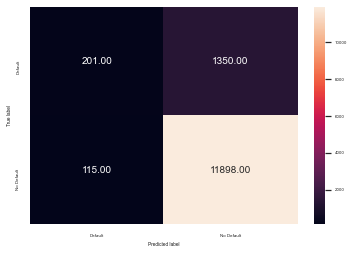

None

Recall: 0.12959381044487428

Precision: 0.6360759493670886

F1 Score: 0.21531869309051957

Roc Auc Score: 0.5600104239105249


In [30]:
print("Training accuracy",lr.score(X_train,y_train))  
print()
print("Testing accuracy",lr.score(X_test, y_test))
print()
print('Confusion Matrix')
print(draw_cm(y_test,y_predict))
print()
print("Recall:",recall_score(y_test,y_predict))
print()
print("Precision:",precision_score(y_test,y_predict))
print()
print("F1 Score:",f1_score(y_test,y_predict))
print()
print("Roc Auc Score:",roc_auc_score(y_test,y_predict))

In [101]:
print( 'Total Accuracy : ',np.round( accuracy_score( y_test, lr.predict(X_test) ), 2 ) ) # We have got total accuracy as 90%

Total Accuracy :  0.89


In [104]:
f1=pd.DataFrame()
f1['Col']=X_train.columns
f1['Coeff']=np.round(abs(lr.coef_[0]),2)
f1.sort_values(by='Coeff',ascending=False)

,Col,Coeff
11,poutcome,0.73
6,housing,0.50
8,contact,0.35
3,education,0.17
7,loan,0.17
2,marital,0.16
10,previous,0.06
0,age,0.02
1,job,0.02
4,default,0.02


Poutcome , Housing , COntact,education,loan,marital - Most important variables in decision

Previous , age, job , default - also has an impact

In [71]:
resultsDf = pd.DataFrame({'Method':['Logistic Regression'], 'accuracy': ['0.89']})
resultsDf = resultsDf[['Method', 'accuracy']]
resultsDf

,Method,accuracy
0,Logistic Regression,0.89


In [34]:
y_predicted =  lr.predict(X_test)
y_predicted

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [35]:
z = pd.DataFrame()                                               
z['Actual'] = y_test.values                                      
z['Probaility that output is 0'] = lr.predict_proba(X_test)[:,0]
# Probabilities predicted by Logistic regression model
z['Probaility that output is 1'] = lr.predict_proba(X_test)[:,1]

z['Predicted'] = lr.predict(X_test)#Predicting target variable using sklearn Logistic regression

z.head()

# In sklearn default threshold is 0.5
# therfore for all the values whose probability for 1 is greater than 0.5 will be predicted as 1

,Actual,Probaility that output is 0,Probaility that output is 1,Predicted
0,0,0.959811,0.040189,0
1,0,0.908508,0.091492,0
2,0,0.887186,0.112814,0
3,1,0.503895,0.496105,0
4,0,0.956864,0.043136,0


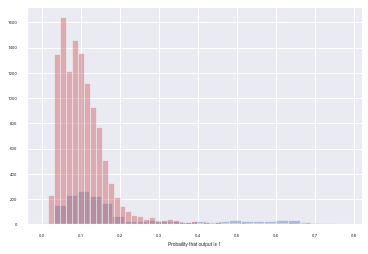

<Figure size 2160x1440 with 0 Axes>

In [42]:
sns.distplot( z[z['Actual'] == 1]["Probaility that output is 1"], kde=False, color = 'b' )
sns.distplot( z[z['Actual'] == 0]["Probaility that output is 1"], kde=False, color = 'r' )
#plt.size
plt.figure(figsize=(30,20))
plt.show()

## Build Decision Tree Model

In [53]:
dTree = DecisionTreeClassifier(criterion = 'entropy', random_state=1)
dTree.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=1)

In [54]:
## Scoring
print(dTree.score(X_train, y_train))
print(dTree.score(X_test, y_test))


0.9985464656997504
0.8193010911235624


In [55]:
# Pruning data

clf_pruned = DecisionTreeClassifier(criterion = "entropy", random_state = 100,
                               max_depth=3, min_samples_leaf=5)
clf_pruned.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=5,
                       random_state=100)

In [57]:
preds_pruned = clf_pruned.predict(X_test)
preds_pruned_train = clf_pruned.predict(X_train)

In [58]:
print(accuracy_score(y_test,preds_pruned))
print(accuracy_score(y_train,preds_pruned_train))

# There is increase in accuracy after reducing over fitting 

0.895532291359481
0.8917116946314027


In [62]:
acc_DT = accuracy_score(y_test, preds_pruned)

In [65]:
xvar = depositdata.drop('Target',axis=1)
feature_cols=xvar.columns

In [66]:
## Calculating feature importance

feat_importance = clf_pruned.tree_.compute_feature_importances(normalize=False)


feat_imp_dict = dict(zip(feature_cols, clf_pruned.feature_importances_))
feat_imp = pd.DataFrame.from_dict(feat_imp_dict, orient='index')
feat_imp.sort_values(by=0, ascending=False)

,0
poutcome,0.656145
contact,0.207357
age,0.111310
housing,0.012577
marital,0.009525
pdays,0.003086
job,0.000000
education,0.000000
default,0.000000
balance,0.000000


 Conclusion from DTREE :Age , Contact , poutcome , housing , marital and pdays mostly have an impact on the results

In [87]:
resultsDf1 = pd.DataFrame({'Method':['Decision Tree'], 'accuracy': acc_DT})
resultsDfq = resultsDf1[['Method', 'accuracy']]
RESULT1=resultsDf.append(resultsDf1)
RESULT1

,Method,accuracy
0,Logistic Regression,0.89
0,Decision Tree,0.895532


## Ensemble Learning - Bagging

In [73]:
from sklearn.ensemble import BaggingClassifier
bgcl = BaggingClassifier(base_estimator=dTree, n_estimators=50,random_state=1)
bgcl = bgcl.fit(X_train, y_train)


0.8851371276909467


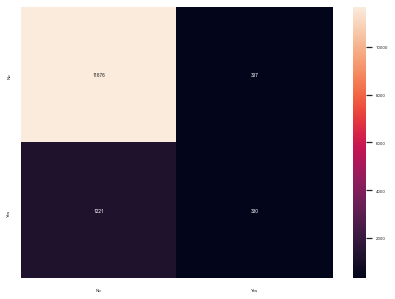

In [82]:
y_predict = bgcl.predict(X_test)

print(bgcl.score(X_test , y_test))

cm=metrics.confusion_matrix(y_test, y_predict,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')



In [93]:
resultsDf2 = pd.DataFrame({'Method':['Bagging'], 'accuracy': bgcl.score(X_test , y_test)})
resultsDf2 = resultsDf2[['Method', 'accuracy']]
RESULT2=resultsDf2.append(RESULT1)
RESULT2

,Method,accuracy
0,Bagging,0.885137
0,Logistic Regression,0.89
0,Decision Tree,0.895532


## Ensemble Learning - Adaboosting

In [75]:
from sklearn.ensemble import AdaBoostClassifier
abcl = AdaBoostClassifier(n_estimators=10, random_state=1)
abcl = abcl.fit(X_train, y_train)


0.8945738720141552


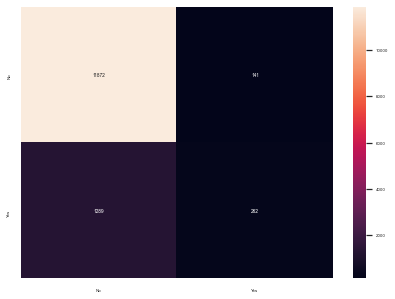

In [94]:
y_predict = abcl.predict(X_test)
print(abcl.score(X_test , y_test))

cm=metrics.confusion_matrix(y_test, y_predict,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')



In [95]:
resultsDf3 = pd.DataFrame({'Method':['AdaBoosting'], 'accuracy': abcl.score(X_test , y_test)})
resultsDf3 = resultsDf3[['Method', 'accuracy']]
RESULT3=resultsDf3.append(RESULT2)
RESULT3

,Method,accuracy
0,AdaBoosting,0.894574
0,Bagging,0.885137
0,Logistic Regression,0.89
0,Decision Tree,0.895532


## Ensemble Learning - GradientBoost

In [77]:
from sklearn.ensemble import GradientBoostingClassifier
gbcl = GradientBoostingClassifier(n_estimators = 50,random_state=1)
gbcl = gbcl.fit(X_train, y_train)


0.8958271896195813


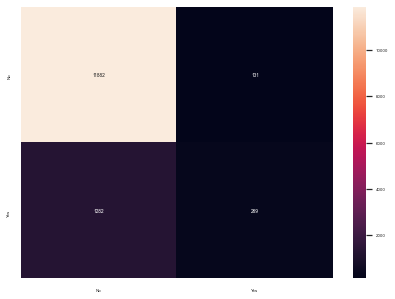

In [96]:
y_predict = gbcl.predict(X_test)
print(gbcl.score(X_test, y_test))
cm=metrics.confusion_matrix(y_test, y_predict,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

In [97]:
resultsDf4 = pd.DataFrame({'Method':['Gradient Boost'], 'accuracy': gbcl.score(X_test , y_test)})
resultsDf4 = resultsDf4[['Method', 'accuracy']]
RESULT4=resultsDf4.append(RESULT3)
RESULT4

,Method,accuracy
0,Gradient Boost,0.895827
0,AdaBoosting,0.894574
0,Bagging,0.885137
0,Logistic Regression,0.89
0,Decision Tree,0.895532


## Ensemble Random Forest Classifier

In [79]:
from sklearn.ensemble import RandomForestClassifier
rfcl = RandomForestClassifier(n_estimators = 50, random_state=1,max_features=12)
rfcl = rfcl.fit(X_train, y_train)


0.8846947803007962


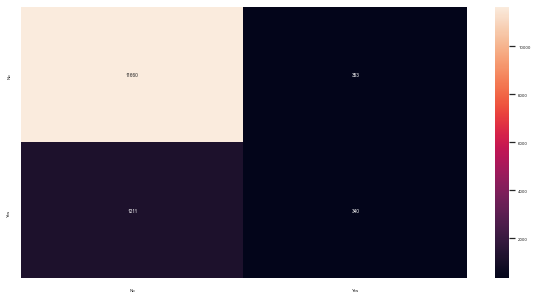

In [81]:
y_predict = rfcl.predict(X_test)
print(rfcl.score(X_test, y_test))
cm=metrics.confusion_matrix(y_test, y_predict,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (10,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

In [100]:
resultsDf5 = pd.DataFrame({'Method':['Random Forest'], 'accuracy': rfcl.score(X_test , y_test)})
resultsDf5 = resultsDf5[['Method', 'accuracy']]
RESULT5=resultsDf5.append(RESULT4)
RESULT5.set_index('Method')

,accuracy
Method,
Random Forest,0.884695
Gradient Boost,0.895827
AdaBoosting,0.894574
Bagging,0.885137
Logistic Regression,0.89
Decision Tree,0.895532


Considering the accuracy of all the models , Mostly all models have accuracy of 88-89% 

Taking all decimals into account , Gradient Boost has the maximum accuracy and can be better than all other models